# SSH Open Marketplace data quality overview

This notebook offers an overview of the SSH Open Marketplace dataset and was built to help moderators to: 1/ gain a better understanding of the SSH Open Marketplace data population; 2/ prioritising their curation tasks.  


## 0. Requirements to run the notebook

This section should give all the relevant information to "interact" with the MP data (whatever the method we choose at the end).



## 0.1
*There are a number of external libraries needed to run the notebook, a cell with python import commands is required to import them. Below the import for libraries needed for this notebook*

In [48]:
import pandas as pd #to manage dataframes
import matplotlib.pyplot as plt #to create histograms and images
import seaborn as sns #to create histograms and images
import json #to manage json objects
from sshmarketplacelib import MPData as mpd
from sshmarketplacelib import  eval as eva, helper as hel

## 0.2

*The data that we want in this notebook check must be downloaded, the following cell downloads data using the util functions.*

In [49]:

mpdata = mpd()
df_tool_flat =mpdata.getMPItems ("toolsandservices", True)
df_publication_flat =mpdata.getMPItems ("publications", True)
df_trainingmaterials_flat =mpdata.getMPItems ("trainingmaterials", True)
df_workflows_flat =mpdata.getMPItems ("workflows", True)
df_datasets_flat =mpdata.getMPItems ("datasets", True)

getting data from local repository...
getting data from local repository...
getting data from local repository...
getting data from local repository...
getting data from local repository...


In [50]:
help(mpdata.getMPItems)

Help on method getMPItems in module sshmarketplacelib.mpdata:

getMPItems(itemscategory, localrepository=False, pages=0) method of sshmarketplacelib.mpdata.MPData instance
    Loads data from MP dataset. This method creates a dataframe, stores it in a local repository and returns it to the caller.
    
    Parameters:
    -----------
    itemscategory : str
        The category of items, possible values are: "toolsandservices", "publications", "trainingmaterials", "workflows", "dataset"
    localrepository : boolean, optional
    pages : int, optional
        The number of pages, default is all
    
    Returns:
    --------
    DataFrame: Returning value
    
    If the localrepository parameter is 'FALSE' or is not specified, the items are downloaded from the MP dataset, 
    if the localrepository parameter is 'TRUE' the items are first searched in the local repository and 
    if they are not present they are downloaded from the remote MP dataset. 
    When the items are downloaded

## 0.2.1
*The function getMPItems(category, local) used in the previous cell, returns all the items of the specific category as a table where the colums are the attributes. It is useful to display the structure of the table. In the next cell the structure of the __df_publication_flat__ table is shown(all tables obtained with the getMPItems functions have the same structure)*

In [51]:
df_tool_flat.head()



,id,category,label,persistentId,lastInfoUpdate,status,description,contributors,properties,externalIds,...,thumbnail.concept.code,thumbnail.concept.vocabulary.code,thumbnail.concept.vocabulary.scheme,thumbnail.concept.vocabulary.namespace,thumbnail.concept.vocabulary.label,thumbnail.concept.vocabulary.closed,thumbnail.concept.label,thumbnail.concept.notation,thumbnail.concept.uri,thumbnail.concept.candidate
0,28230,tool-or-service,140kit,SIU1nO,2021-11-23T17:24:25+0000,approved,140kit provides a management layer for tweet c...,"[{'actor': {'id': 2224, 'name': 'Ian Pearce, D...","[{'type': {'code': 'mode-of-use', 'label': 'Mo...",[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,36324,tool-or-service,3DF Zephyr - photogrammetry software - 3d mode...,4gDAHv,2022-01-13T11:49:02+0000,approved,3DF Zephyr\[1\]\[2\] is a commercial photogram...,[],"[{'type': {'code': 'language', 'label': 'Langu...",[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40579,tool-or-service,3DHOP,UcxOmD,2022-03-18T16:25:26+0000,approved,3DHOP (3D Heritage Online Presenter) is an ope...,[],"[{'type': {'code': 'language', 'label': 'Langu...",[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,36555,tool-or-service,3DHOP: 3D Heritage Online Presenter,uFIMPQ,2022-01-13T11:50:32+0000,approved,No description provided.,[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,36189,tool-or-service,3DReshaper \| 3DReshaper,kAkzuz,2022-01-13T11:47:44+0000,approved,No description provided.,[],"[{'type': {'code': 'language', 'label': 'Langu...",[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1. SSH Open Marketplace items provenance

In [52]:
utils=hel.Util()
#get the dataframe
df_items_by_sources=utils.getAllItemsBySources()
#prints the content of the dataframe
#print('{:<30}N. Items'.format("Source Label"), end='\n')
# the function head(n) shows the first n rows of a dataframe
df_items_by_sources.head(10)

dblp: DH Publications            2810
TAPoR                            1302
CLARIN Resource Families          925
SSK Zotero Resources              352
Humanities Data                   301
NA                                170
The Programming Historian         169
DARIAH-CAMPUS                      80
CESSDA                             62
Language Resource Switchboard      50
Name: source.label, dtype: int64

The following cell uses the function *plot* of the dataframe to draw a bar chart. 

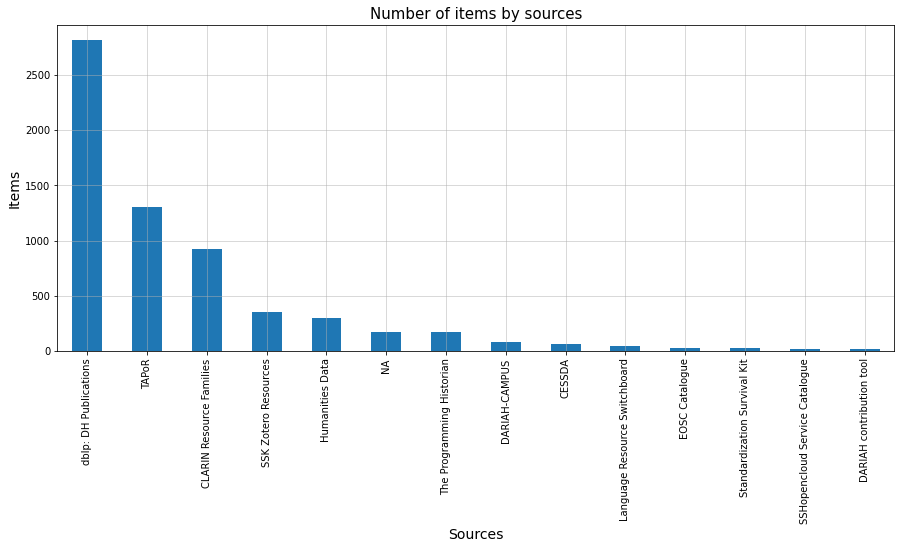

In [53]:
fig, ax = plt.subplots()
df_items_by_sources.plot(kind='bar', figsize=(15,6))
plt.grid(alpha=0.6)
ax.yaxis.set_label_text("")
ax.set_title("Number of items by sources", fontsize=15)
ax.set_xlabel('Sources', fontsize=14)
ax.set_ylabel('Items', fontsize=14);
plt.show()

### Item Categories by source providers

In [54]:
df_categories_bysources=utils.getCategoriesBySources()
df_categories_bysources.head()

source.label,CESSDA,CLARIN Resource Families,DARIAH contribution tool,DARIAH-CAMPUS,EOSC Catalogue,Humanities Data,Language Resource Switchboard,SSHopencloud Service Catalogue,SSK Zotero Resources,Standardization Survival Kit,TAPoR,The Programming Historian,dblp: DH Publications
Categories,,,,,,,,,,,,,
dataset,0.0,925.0,3.0,0.0,0.0,301.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
publication,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136.0,0.0,0.0,0.0,2810.0
tool-or-service,0.0,0.0,11.0,0.0,27.0,0.0,50.0,16.0,154.0,0.0,1302.0,0.0,0.0
training-material,62.0,0.0,1.0,80.0,0.0,0.0,0.0,1.0,62.0,0.0,0.0,169.0,0.0
workflow,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0


### 1.2 Iitems created by individual users 

The dataset of items not created by 'system importer' can be obtained by filtering the value of the correspondent attribute.  
The attribute in the dataset where the name of the creator is stored is *informationContributor.username* , in the cell below the *publication* dataset is filtered to individuate items not created by System importer. 

In [55]:
publications_imported_by_Si=df_publication_flat[(df_publication_flat['informationContributor.username']!='System importer') & (df_publication_flat['source.label'].isna())]
publications_imported_by_Si[['label', 'category','informationContributor.displayName', 'source.label']].head()

,label,category,informationContributor.displayName,source.label
223,Archaeology Data Service / Digital Antiquity G...,publication,Administrator,NaN
930,Documentation about the Europeana Data Model,publication,Administrator,NaN
1318,Information Organization and Access in Digital...,publication,Laure Barbot,NaN
1395,ISIDORE celebrates its 10th anniversary,publication,Edward Gray,NaN
2114,ROSSIO Infrastructure: a digital research tool...,publication,Laure Barbot,NaN


The *toolsandservices* dataset is filtered to individuate items not created by System importer.

In [56]:
tools_imported_by_Si=df_tool_flat[(df_tool_flat['informationContributor.username']!='System importer') & (df_tool_flat['source.label'].isna())]
tools_imported_by_Si[['label', 'category','informationContributor.displayName', 'source.label']].tail()

,label,category,informationContributor.displayName,source.label
1579,WebLicht,tool-or-service,Laure Barbot,NaN
1619,WissKI,tool-or-service,Edward Gray,NaN
1644,WorldCat,tool-or-service,Laure Barbot,NaN
1656,XML to TEILex0,tool-or-service,Laure Barbot,NaN
1669,YouTube,tool-or-service,Administrator,NaN


In [57]:
df_all_items=pd.concat([df_tool_flat, df_publication_flat, df_trainingmaterials_flat, df_workflows_flat, df_datasets_flat])
item_imported_by_user=df_all_items[(df_all_items['informationContributor.username']!='System importer')& (df_all_items['source.label'].isna())]
item_imported_by_user[['label', 'category','informationContributor.displayName']].sort_values('category').tail(8)

,label,category,informationContributor.displayName
271,Screencast: Processing Europeana Newspaper Col...,training-material,Laure Barbot
280,SSHOC League of Data,training-material,Administrator
281,SSHOC Webinar: CLARIN Hands-on Tutorial on Tra...,training-material,Martin Kirnbauer
282,SSHOC webinar: Introducing the newly launched ...,training-material,Martin Kirnbauer
227,OpenRefine to Wikibase: Data Upload Pipeline,training-material,Laure Barbot
56,COST Action 16111: ETHMIGSURVEYDATA Zenodo Com...,training-material,Martin Kirnbauer
12,How to create a workflow in the SSH Open Marke...,workflow,Administrator
15,Intertextuality phenomena in European drama hi...,workflow,Edward Gray


## 2. Non-redundancy

the same entity should only be referenced once in the SSH Open Marketplace. Duplicate items are merged to ensure the coherence of the items showcased in the portal. 

### 2.1 Identification of the duplicates

*Duplicates are individuated for every category by defining the attributes that should be inspected to identify equal items. In the next cell the function __getDuplicates(category, attributes)__ is invoked to get for every category the subset of items having the same value in the 'attribute' label, each set of duplicated items is stored in a variable*

In [58]:
df_tool_duplicates=utils.getDuplicates(df_tool_flat, 'label')
df_publication_duplicates=utils.getDuplicates(df_publication_flat, 'label')
df_trainingmaterials_duplicates=utils.getDuplicates(df_trainingmaterials_flat, 'label')
df_workflows_duplicates=utils.getDuplicates(df_workflows_flat, 'label')
df_datasets_duplicates=utils.getDuplicates(df_datasets_flat, 'label')

## 2.1.1
*The  sets of duplicated items can be inspected, in the next cell the number of duplicated items for every category is shown*

In [59]:
print (f'There are: {df_tool_duplicates.shape[0]} duplicated tools, {df_publication_duplicates.shape[0]} duplicated publications,'
       +f' {df_trainingmaterials_duplicates.shape[0]} duplicated training materials,'+
      f' {df_workflows_duplicates.shape[0]} duplicated workflows,'+
      f' {df_datasets_duplicates.shape[0]} duplicated datasets')
    

There are: 0 duplicated tools, 4 duplicated publications, 4 duplicated training materials, 0 duplicated workflows, 232 duplicated datasets


## 2.1.2

*It's possible to see the values of some of the duplicated items. In the next cell there is a command to show 3 items of the dataset for duplicated tools.*

In [60]:
df_trainingmaterials_duplicates.head(3)

,MPUrl,id,category,label,persistentId,lastInfoUpdate,status,description,contributors,properties,...,thumbnail.concept.vocabulary.code,thumbnail.concept.vocabulary.scheme,thumbnail.concept.vocabulary.namespace,thumbnail.concept.vocabulary.label,thumbnail.concept.vocabulary.closed,thumbnail.concept.label,thumbnail.concept.notation,thumbnail.concept.uri,thumbnail.concept.candidate,thumbnail.info.filename
40,training-material/AzXNMy,40548,training-material,Como instalei o Browsertrix no meu computador,AzXNMy,2022-03-14T14:26:51+0000,approved,Browsertrix installation guide.,"[{'actor': {'id': 9226, 'name': 'Arquivo.pt', ...","[{'type': {'code': 'keyword', 'label': 'Keywor...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,training-material/bD4Jl6,40412,training-material,Como instalei o Browsertrix no meu computador,bD4Jl6,2022-01-18T10:31:38+0000,approved,Guia de instalação do Browsertrix para não esp...,"[{'actor': {'id': 9163, 'name': 'Ricardo Basíl...","[{'type': {'code': 'language', 'label': 'Langu...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,training-material/KbYQxy,36300,training-material,ContextCapture tutorials,KbYQxy,2022-01-13T11:48:53+0000,approved,"To get started with ContextCapture, we recomme...",[],"[{'type': {'code': 'language', 'label': 'Langu...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.1.3

*As shown in the section __0.2.1__ of this notebook every row in the table includes 30 different attributes, it may be useful to define a list of attributes and use it when showing the data. In the next cell a list of attributes is defined and used as visualization mask for 6 items in the duplicated tool dataset*

In [61]:
# the list of attributes
vis_attr=['MPUrl', 'persistentId', 'label','description', 'source.label','accessibleAt']
df_tool_duplicates[vis_attr].head(6)

,MPUrl,persistentId,label,description,source.label,accessibleAt


*The list of attributes can be applied to all sets of duplicated items, in the next two cells it is used to filter attributes in the set of duplicated workflows and training materials*

In [62]:
df_workflows_duplicates[vis_attr].head(6)

,MPUrl,persistentId,label,description,source.label,accessibleAt


In [63]:
df_trainingmaterials_duplicates[vis_attr].head(6)

,MPUrl,persistentId,label,description,source.label,accessibleAt
40,training-material/AzXNMy,AzXNMy,Como instalei o Browsertrix no meu computador,Browsertrix installation guide.,DARIAH contribution tool,[https://tinyurl.com/instalar-browsertrix]
41,training-material/bD4Jl6,bD4Jl6,Como instalei o Browsertrix no meu computador,Guia de instalação do Browsertrix para não esp...,NaN,[https://tinyurl.com/instalar-browsertrix]
50,training-material/KbYQxy,KbYQxy,ContextCapture tutorials,"To get started with ContextCapture, we recomme...",SSK Zotero Resources,[https://www.acute3d.com/tutorials/]
51,training-material/vySU0m,vySU0m,ContextCapture tutorials,"To get started with ContextCapture, we recomme...",SSK Zotero Resources,[https://www.acute3d.com/tutorials/]


## 3. Completeness & metadata quality

We want to know how complete the SSH Open Marketplace dataset is, i.e. what is the level of quality of metadata describing the items populating the Marketplace.
As the data model of the Marketplace differentiates between attributes and properties, we want to mix these two different fields in the overview provided in this section.

### 3.1 Null values

## 3.1.1 Null values in attributes by item types
*There are a number of functions for null values. The function __getNullValues()__ returns a table where the columns are the category and the rows are the attributes. The number in the cell individuated by an attribute and a category indicates how many null values there are in that category for the attribute. The function calculates the table for all the categories downloaded in the notebook. In this sepcific case all datasets downloaded in section __0.2__. The next cell gets the null values and shows them* 

In [64]:
df_null_values=utils.getNullValues()
df_null_values[0].head(35)

/Users/cesare/eclipse-workspace/mplib/sshoccurationprod/sshmarketplacelib/helper.py:485: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ts_persistentId_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_items=pd.merge(df_items, df_prop_data_tmp, left_on='persistentId',right_on='ts_persistentId', how = 'outer').fillna(np.nan)


category,dataset,publication,tool-or-service,training-material,workflow
property: missed values,,,,,
accessibleAt,4,20,478,14,2
composedOf,1234,2953,1687,405,0
concept.candidate,67,53,63,1,0
concept.code,67,53,63,1,0
concept.definition,1232,2950,1518,377,18
concept.label,67,53,63,1,0
concept.notation,1229,2948,644,252,9
concept.uri,67,53,63,1,0
concept.vocabulary.closed,67,53,63,1,0


## 3.1.2
*The function __getNullValues(attributes)__ returns a table where the columns are the categories and the rows are the attributes listed in the invocation.  The list of attributes should contain 1 or more attribute name separated by ','.
The number in the cell individuated by an attribute and a category indicates how many null values there are in that category for the attribute.  
The function calculates the table for all the dataset downloaded in the notebook. In this sepcific case all datasets downloaded in section __0.2__. The next cell searches for null values of properties: accessibleAt, description, contributors and relatedItems.* 

In [65]:
df_nullpart_values=utils.getNullValues('accessibleAt, contributors, relatedItems, description, discipline, keyword')
df_nullpart_values[0].head(6)

/Users/cesare/eclipse-workspace/mplib/sshoccurationprod/sshmarketplacelib/helper.py:485: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ts_persistentId_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_items=pd.merge(df_items, df_prop_data_tmp, left_on='persistentId',right_on='ts_persistentId', how = 'outer').fillna(np.nan)
/Users/cesare/eclipse-workspace/mplib/sshoccurationprod/sshmarketplacelib/helper.py:498: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ts_persistentId_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_items=pd.merge(left=df_items, right=tmp, left_on='persistentId', right_on='ts_persistentId', how = 'outer').fillna(np.nan)


category,dataset,publication,tool-or-service,training-material,workflow
property: missed values,,,,,
accessibleAt,4,20,478,14,2
contributors,926,68,209,56,0
relatedItems,1230,2780,1478,308,27
description,0,2856,53,23,1
discipline,1229,2949,1595,259,17
keyword,88,2945,269,63,8


## 3.1.3

*The function __getItemsWithNullValues(props, all)__ returns all items where the properties indicated in the list have null values.  
In the next cell:*

<ol>
    <li> <i>the function is invoked to get all items where the accessibleAt, contributors and relatedItems have null values, the parameter True means that all the attributes/properties in the list must be null in an item</i></li>
    <li> <i>the visualization mask is defined</i></li>
    <li> <i>some items are shown</i></li>
    </ol>
  

In [66]:
#1
df_items_null_values=utils.getItemsWithNullValues('accessibleAt, contributors, relatedItems', True)
#2
vis_items_mask=['MPUrl', 'persistentId', 'category', 'label', 'source.label','accessibleAt','contributors', 'relatedItems']
#3
df_items_null_values[vis_items_mask].tail()

,MPUrl,persistentId,category,label,source.label,accessibleAt,contributors,relatedItems
4956,training-material/m6qr2d,m6qr2d,training-material,Training Professionals Network,SSHopencloud Service Catalogue,NaN,NaN,NaN
5141,dataset/u11tRS,u11tRS,dataset,Audio Transcript Data,SSHopencloud Service Catalogue,NaN,NaN,NaN
5625,dataset/s5Myph,s5Myph,dataset,Hungarian Sign Language Corpus,CLARIN Resource Families,NaN,NaN,NaN
5664,dataset/gMaWvn,gMaWvn,dataset,Korpusbasierte Analyse österreichischer Parlam...,CLARIN Resource Families,NaN,NaN,NaN
5947,dataset/Cdyq3J,Cdyq3J,dataset,Signs of Ireland,CLARIN Resource Families,NaN,NaN,NaN


### 3.1.3.1

*The variable df_items_null_values contains the list of items where the values for accessibleAt, contributors and relatedItems are all null, we can inspect the dataset.  
How many items are in the dataset?  
The cell below prints the number of items in the dataset*

In [67]:

print (f'\n There are {df_items_null_values.shape[0]} items where the values in attributes accessibleAt, contributors, relatedItems are null \n')



 There are 17 items where the values in attributes accessibleAt, contributors, relatedItems are null 



*What are the sources?*

In [68]:
test=df_items_null_values.groupby('source.label').count()['label']
test

source.label
CLARIN Resource Families           3
SSHopencloud Service Catalogue    10
TAPoR                              1
The Programming Historian          1
Name: label, dtype: int64

In [69]:
rend_nv_table_df=df_items_null_values[['MPUrl', 'category', 'source.label','label']]
clickable_nv_table = rend_nv_table_df.style.format({'MPUrl': utils.make_clickable})
clickable_nv_table

,MPUrl,category,source.label,label
20,tool-or-service/nMm0wM,tool-or-service,nan,Adobe Acrobat Reader
74,tool-or-service/CqCK1n,tool-or-service,SSHopencloud Service Catalogue,API for Generations and Gender Programme (GGP)
95,tool-or-service/wLzD4H,tool-or-service,SSHopencloud Service Catalogue,Audio Survey Module Questionnaire and Fieldwork Implementation Guideline
230,tool-or-service/m5jJ5s,tool-or-service,SSHopencloud Service Catalogue,Code for data exchange between TMT and open source CAT software
330,tool-or-service/8lXz8g,tool-or-service,SSHopencloud Service Catalogue,Data Confidentiality Schema for Sensitive Data
427,tool-or-service/9McIgG,tool-or-service,SSHopencloud Service Catalogue,ERAN Pilot: Specifications for Secure Remote Access to Sensitive Research Data
496,tool-or-service/a47VVu,tool-or-service,SSHopencloud Service Catalogue,Framework for data use agreement
666,tool-or-service/NvN0y8,tool-or-service,TAPoR,iTunesCyrFix
778,tool-or-service/2KpJe6,tool-or-service,SSHopencloud Service Catalogue,Making Data Findable by being Citable - Tools
1261,tool-or-service/tsbNWP,tool-or-service,SSHopencloud Service Catalogue,SSH GDPR Code of Conduct


### 3.1.3.2 - Coverage of *recommended* attributes/dynamic properties

The following shows how values for the recomennded properties are distributed in categories



In [70]:
recommended_ts='accessibleAt, contributors, externalIds, media, relatedItems, version, activity, keyword, discipline, language, tool-family, mode-of-use, intended-audience, see-also, user-manual-url, helpdesk-url, license, terms-of-use-url, technology-readiness-level'
recommended_ts_mask=['persistentId', 'MPUrl', 'label','accessibleAt', 'contributors', 'externalIds', 'media', 'relatedItems', 'version', 'activity', 'keyword', 'discipline', 'language', 'tool-family', 'mode-of-use', 'intended-audience', 'see-also', 'user-manual-url', 'helpdesk-url', 'license', 'terms-of-use-url', 'technology-readiness-level']

df_items_null_values=utils.getItemsWithNullValues(recommended_ts, False)

#### Coverage for Category and Source Providers

In [71]:
source_provider_label='TAPoR'
df_items_null_values_sp=df_items_null_values[(df_items_null_values['source.label']==source_provider_label) & (df_items_null_values['category']=='tool-or-service')]

df_coverage_sp=df_items_null_values_sp.loc[ : ,recommended_ts_mask]
#df.loc[df['A'] > 2, 'B'] = new_val
df_coverage_sp['value']=df_coverage_sp.isnull().sum(axis=1)
#df_coverage_sp.loc[:,'value']=df_coverage_sp.isnull().sum(axis=1)
#df_coverage_sp_up=df_coverage_sp[['MPUrl', 'persistentId', 'label', 'value']] 
labels_sp=df_coverage_sp[['MPUrl', 'persistentId', 'label', 'value']].groupby('value').count()['label']


#labels_sp.shape
#df_coverage_sp.head()

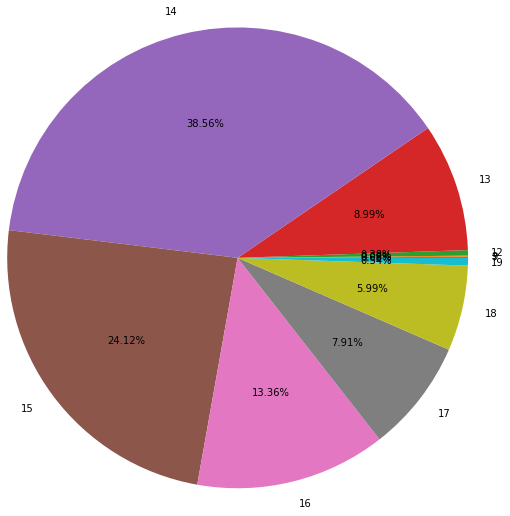

In [25]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
explode = [0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]

ax.pie(labels_sp.values, labels = labels_sp.index,   autopct='%1.2f%%', radius = 2)
plt.show()

#### Coverage for all Tools or Services 

In [72]:
df_items_null_values=utils.getItemsWithNullValues(recommended_ts, False)
df_items_null_values=df_items_null_values[df_items_null_values.category=='tool-or-service']
df_coverage=df_items_null_values.loc[ : ,recommended_ts_mask]
df_coverage['value']=df_coverage.isnull().sum(axis=1)
#df_coverage.isnull().sum(axis=1)
df_coverage_up=df_coverage[['MPUrl', 'persistentId', 'label', 'value']] 

In [27]:
#xMeq9F
#df_items_null_values[recommended_ts_mask].head()

In [28]:
labels=df_coverage_up.groupby('value').count()['label']

test=labels[labels.values>11]

#labels.shape

#print(labels)


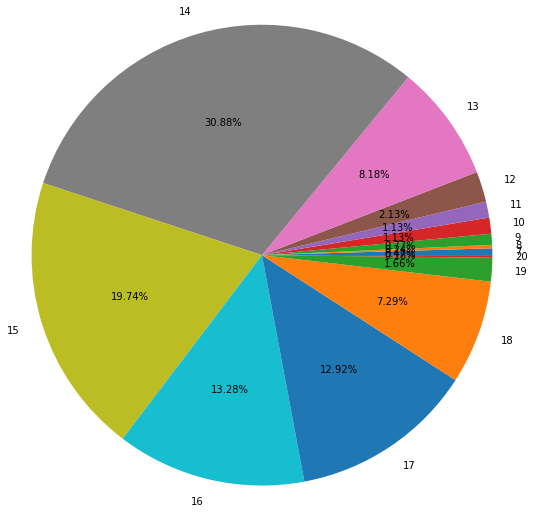

In [29]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
explode = [0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]

ax.pie(labels.values, labels = labels.index,   autopct='%1.2f%%', radius = 2)
plt.show()

#### List of tools or services with a specific number of null values in recommended properties

In [30]:
number_of_null_values=18

myw_url_status=df_coverage_up[df_coverage_up.value==number_of_null_values]
myclickable_table = myw_url_status.style.format({'MPUrl': utils.make_clickable})
myclickable_table

,MPUrl,persistentId,label,value
3,tool-or-service/uFIMPQ,uFIMPQ,3DHOP: 3D Heritage Online Presenter,18
6,tool-or-service/zrfCly,zrfCly,3DVIA Virtools,18
21,tool-or-service/U6hzqf,U6hzqf,Adobe After Effects,18
25,tool-or-service/aeQ2f6,aeQ2f6,Adobe InDesign,18
26,tool-or-service/E34Hob,E34Hob,Adobe Photoshop,18
39,tool-or-service/AB57Ny,AB57Ny,aLTAG3D - a Long Term Archive Generator for 3D,18
55,tool-or-service/gKEK3M,gKEK3M,AnnotateIt,18
68,tool-or-service/r43yWg,r43yWg,Apache OpenNLP,18
70,tool-or-service/7PyEBu,7PyEBu,Apache Stanbol,18
88,tool-or-service/TmiBJ7,TmiBJ7,AskSam,18


#### Coverage for training materials

In [31]:
recommended_tm='accessibleAt, contributors, externalIds, media, relatedItems'
recommended_tm_mask=['persistentId', 'MPUrl', 'label','accessibleAt', 'contributors', 'externalIds', 'media', 'relatedItems']


In [73]:
df_items_null_values=utils.getItemsWithNullValues(recommended_tm, False)
df_tm_null_values=df_items_null_values[df_items_null_values.category=='training-material']
df_tm_coverage=df_tm_null_values.loc[ : , recommended_tm_mask]
df_tm_coverage['value']=df_tm_coverage.isnull().sum(axis=1)
#df_coverage.isnull().sum(axis=1)
df_tm_coverage_up=df_tm_coverage[['MPUrl', 'persistentId', 'label', 'value']] 
df_tm_coverage_up.head()

,MPUrl,persistentId,label,value
4640,training-material/baDTwh,baDTwh,2.1 Error rates and ground truth - Text Digiti...,3
4641,training-material/T3JbA2,T3JbA2,3DHOP - How To,4
4642,training-material/L8gAnu,L8gAnu,3ds Max Tutorials: Introduction,3
4643,training-material/H6Y1zV,H6Y1zV,8 Transcriptions of Speech - The TEI Guidelines,3
4644,training-material/EHGRy5,EHGRy5,Administración de datos en R,2


In [33]:
labels_tm=df_tm_coverage_up.groupby('value').count()['label']
labels_tm.head()

value
1    117
2    131
3    125
4     13
5      1
Name: label, dtype: int64

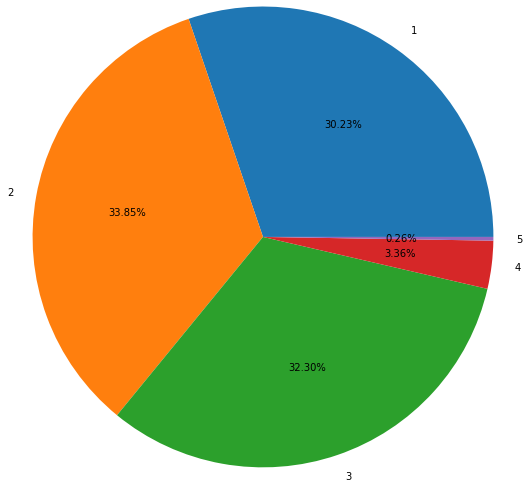

In [34]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
explode = [0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]

ax.pie(labels_tm.values, labels = labels_tm.index,   autopct='%1.2f%%', radius = 2)
plt.show()

## 3.2 Description lengh
For the `description` attribute, there should not be any null_values (this is a mandatory attribute and it is automatically filled with "No description provided" when it is empty at the ingest stage), so we want to list the items with a description length less than 25 and more than 1500 characters.


In [35]:
import numpy as np
df_all_items=pd.concat([df_tool_flat, df_publication_flat, df_trainingmaterials_flat, df_workflows_flat, df_datasets_flat], ignore_index=True)
df_items = df_all_items.replace(utils.empty_description, np.nan)
alt_ed_string=utils.empty_description.replace('.','')
df_items = df_items.replace(alt_ed_string, np.nan)

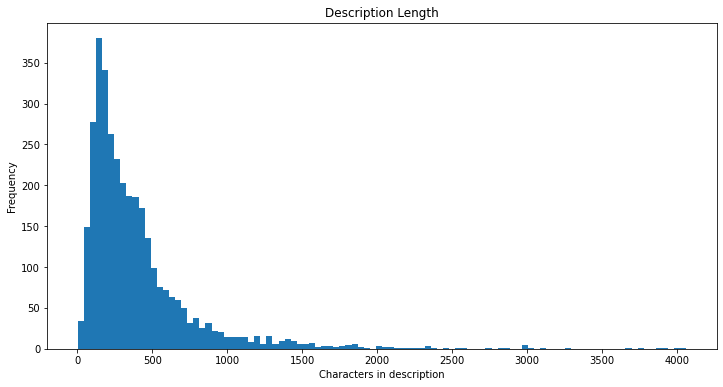

In [36]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(df_items['description'].str.len(),  bins=100)
ax.set_title('Description Length')
ax.set_xlabel('Characters in description')
ax.set_ylabel('Frequency');

In [37]:
minchars=25
maxchars=1500

df_items_d = df_items[(df_items['description'].notnull()) & (df_items['description'].str.len()>=minchars) & (df_items['description'].str.len()<=maxchars)]

df_items_min = df_items[(df_items['description'].notnull()) & (df_items['description'].str.len()<minchars)]

df_items_max = df_items[(df_items['description'].notnull()) & (df_items['description'].str.len()>maxchars)]

print (f"\nThere are {df_items['description'].isna().sum()} items with empty descriptions, "+
       f" {df_items_min['description'].count()} items with description shorter than {minchars} characters,"+
f" {df_items_max['description'].count()} Items with description longer than {maxchars} characters, "+
      f" {df_items_d['description'].count()} Items with description between {minchars} and {maxchars} characters.")
       


There are 2933 items with empty descriptions,  3 items with description shorter than 25 characters, 78 Items with description longer than 1500 characters,  3292 Items with description between 25 and 1500 characters.


The distribution of empty descriptions in items by item sources

In [38]:
df_empty_desc=df_items[df_items['description'].isna()]
df_empty_desc.groupby('source.label').count()['label']

source.label
SSK Zotero Resources             125
Standardization Survival Kit       1
TAPoR                              4
The Programming Historian          2
dblp: DH Publications           2801
Name: label, dtype: int64

*The next cell creates a table with a clickable url for items having description shorter than 25 characters*

In [39]:
rend_desc_table_df=df_items_min[['MPUrl', 'category', 'source.label','label', 'description']]
clickable_shortdesc_table = rend_desc_table_df.style.format({'MPUrl': utils.make_clickable})
clickable_shortdesc_table

,MPUrl,category,source.label,label,description
195,tool-or-service/o2X2Sl,tool-or-service,TAPoR,Chartle,Create simple charts.
918,tool-or-service/5jMQ6a,tool-or-service,SSK Zotero Resources,Offline Getting Started and Manual (pdf),Last Update: 14.12.2017
3402,publication/vwL2JV,publication,SSK Zotero Resources,Multitemporal 3D modelling for cultural heritage emergency during seismic events: Damage assesment of S. Agostino church in Amatrice (RI),6


### 3.3 Media quality
--- still under discussion: how to check thumbnail and media quality?  

## 4. Contextualisation quality 

We want to know how well interlinked the items are in the Marketplace. 
One option could be to have a table presenting:
- as columns, three options: less than 4 relations; between 4 and 10 relations; more than 10 relations
- as raws, the item types OR the sources provenance

values given as results should ideally be clickable and lead to the list of items individuated by the count.





## 6. Activity coverage

We want to see an overview of the activity coverage in the Marketplace dataset, in a dedicated section of the notebook, because this is an important field. 

In [40]:
#the type.code value used as filter value
typecode='activity'
df_list_of_properties_sources=utils.getAllPropertiesBySources()
#filter properties by type.code
df_list_of_activity_properties=df_list_of_properties_sources[df_list_of_properties_sources["type.code"]==typecode]

In [41]:
df_list_of_activity_properties.head()

,MPUrl,type.code,type.label,type.type,type.groupName,type.hidden,type.ord,type.allowedVocabularies,concept.code,concept.vocabulary.code,...,concept.notation,concept.uri,concept.candidate,value,concept.definition,ts_label,persistentId,label,source.label,category
1,tool-or-service/SIU1nO,activity,Activity,concept,Categorisation,False,17,"[{'code': 'tadirah2', 'scheme': 'https://vocab...",capturing,tadirah2,...,,https://vocabs.dariah.eu/tadirah/capturing,False,NaN,NaN,140kit,SIU1nO,140kit,TAPoR,tool-or-service
4,tool-or-service/SIU1nO,activity,Activity,concept,Categorisation,False,17,"[{'code': 'tadirah2', 'scheme': 'https://vocab...",analyzing,tadirah2,...,,https://vocabs.dariah.eu/tadirah/analyzing,False,NaN,NaN,140kit,SIU1nO,140kit,TAPoR,tool-or-service
5,tool-or-service/SIU1nO,activity,Activity,concept,Categorisation,False,17,"[{'code': 'tadirah2', 'scheme': 'https://vocab...",visualAnalysis,tadirah2,...,,https://vocabs.dariah.eu/tadirah/visualAnalysis,False,NaN,NaN,140kit,SIU1nO,140kit,TAPoR,tool-or-service
8,tool-or-service/SIU1nO,activity,Activity,concept,Categorisation,False,17,"[{'code': 'tadirah2', 'scheme': 'https://vocab...",gathering,tadirah2,...,,https://vocabs.dariah.eu/tadirah/gathering,False,NaN,NaN,140kit,SIU1nO,140kit,TAPoR,tool-or-service
23,tool-or-service/rdwzoM,activity,Activity,concept,Categorisation,False,17,"[{'code': 'tadirah2', 'scheme': 'https://vocab...",programming,tadirah2,...,,https://vocabs.dariah.eu/tadirah/programming,False,NaN,NaN,4th Dimension,rdwzoM,4th Dimension,TAPoR,tool-or-service


In [42]:
df_list_of_activity_properties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4183 entries, 1 to 36235
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   MPUrl                         4183 non-null   object
 1   type.code                     4183 non-null   object
 2   type.label                    4183 non-null   object
 3   type.type                     4183 non-null   object
 4   type.groupName                4183 non-null   object
 5   type.hidden                   4183 non-null   bool  
 6   type.ord                      4183 non-null   int64 
 7   type.allowedVocabularies      4183 non-null   object
 8   concept.code                  4183 non-null   object
 9   concept.vocabulary.code       4183 non-null   object
 10  concept.vocabulary.scheme     4183 non-null   object
 11  concept.vocabulary.namespace  4183 non-null   object
 12  concept.vocabulary.label      4183 non-null   object
 13  concept.vocabular

In [43]:
tt_a_df=df_list_of_activity_properties.groupby(['concept.label', 'source.label']).count()['label'].unstack('source.label')

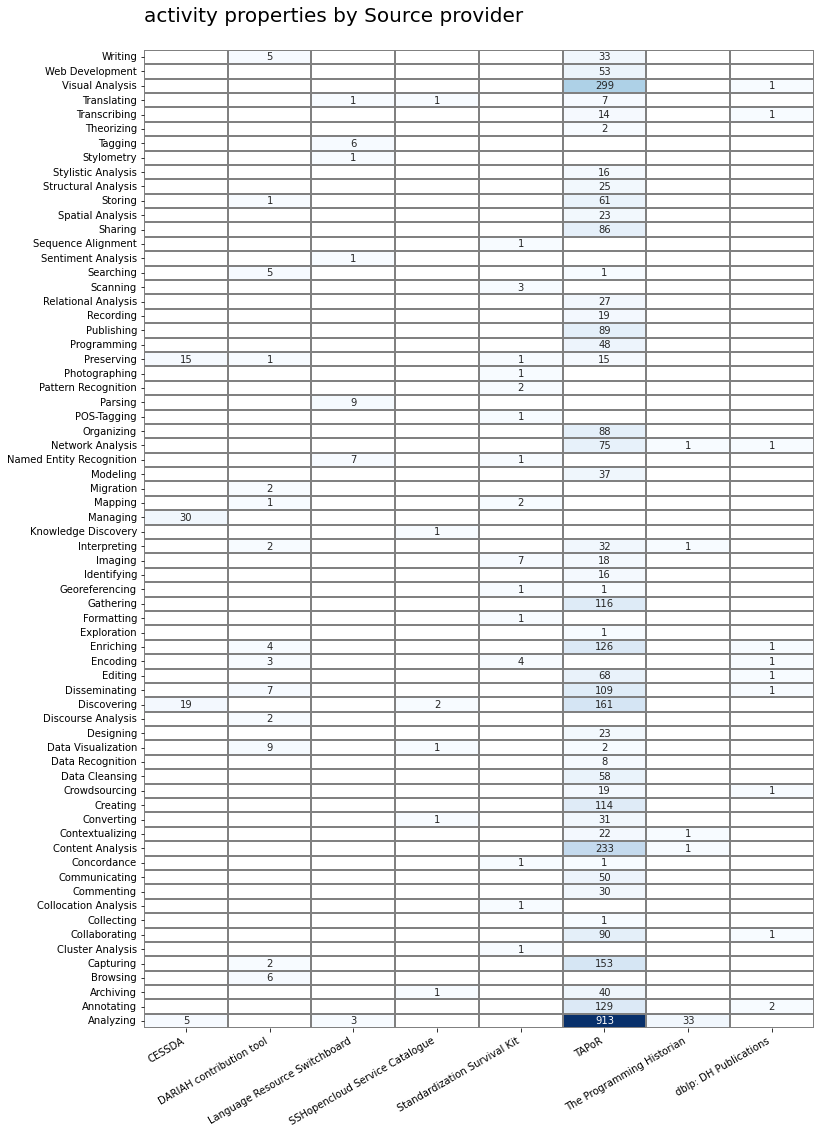

In [44]:
#change values in the next lines to resize the table
fig, ax = plt.subplots(figsize=(12, 18))
sns.heatmap(tt_a_df, annot=True, linewidths=0.1, fmt='.0f', ax=ax, cbar=None, cmap='Blues', linecolor='gray')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.invert_yaxis()
ax.set_xlabel(None)
ax.set_ylabel(None)
#sns.heatmap(df, linewidths=2, linecolor='yellow')
title = typecode+' properties by Source provider\n'
plt.title(title, loc='left', fontsize=20)
plt.show()

# SSHOC Market Place Data Library
A Python library for download and process the SSHOC marketPlace dataset. 
The libary has been designed to be used by the SSHOC Curation Module and provides a set of ad hoc functions that can be used in Python Notebooks or programs.
 
## Usage

To use the library functionalities: 

A - create an instance of mplib.MPData, and loads locally the MP data. The function:

#### getMPItems (category: str, local: boolean) -> DataFrame

downloads MP dataset and store it locally. The data is provided as a Data Frame i.e. data is organized in a tabular fashion and columns are labeled with the names of the attribites in MP datamodel.


 Example:
```Python 
 from mplib import MPData as mpd

 mpdata = mpd()
 ts_df=mpdata.getMPItems ("pubblications", True)
```

the data is returned as a Data Frame:

<table>
<tr>
	<th>id</th><th>	category</th><th>	label</th><th>	persistentId</th><th>	lastInfoUpdate</th><th>	status</th><th>	description</th><th>	contributors</th><th>	properties</th><th>	externalIds</th>
    </tr><tr>
<td>10414</td><td>	publication</td><td>	3D-ICONS -- 3D Digitisation of Icons of Europe...</td><td>	jOum8c</td><td>	2021-06-23T17:03:55+0000</td><td>	approved</td><td>	3D-ICONS was a pilot project funded under the ...	</td><td>[]</td><td>	[{'id': 41261, 'type': {'code': 'language', 'l...	</td><td>[]</td>
 </tr><tr>
<td>7454</td><td>	publication</td><td>	4 Default Text Structure - The TEI Guidelines</td><td>	Y3Vmhy</td><td>	2021-06-22T13:30:43+0000</td><td>	approved</td><td>	No description provided.</td><td>	[]</td><td>	[{'id': 41094, 'type': {'code': 'language', 'l...	</td><td>[]</td>
 </tr><tr>
<td>10738</td><td>	publication</td><td>	9 Dictionaries - The TEI Guidelines</td><td>	vQ7Bvs</td><td>	2021-06-23T17:04:34+0000</td><td>	approved</td><td>	No description provided.</td><td>	[]</td><td>	[{'id': 41163, 'type': {'code': 'language', 'l...	</td><td>[]</td><td>
 </tr>
</table>


B - use the helper functions to analyse the Market Place data, for example the function below returns the number of null values for all propertes in each item category:

#### getNullValues()-> DataFrame


Example:
```Python 
 from mplib import helper as hlpr

 utils = hlpr.Util()
 nv_df=utils.getNullValues()
```


Returns:
<TABLE>
    <tr>
    <th>category <br>property: missed values</th><th>dataset</th><th>publication</th><th>tool-or-service</th><th>	training-material</th><th>	workflow</th><th>
        </tr><tr>
<td>accessibleAt</td><td>	1</td><td>	7</td><td>	475</td><td>	14</td><td>	1</td>
    </tr><tr>
<td>composedOf</td><td>	305</td><td>	137</td><td>	1671</td><td>	321</td><td>	0</td>
    </tr><tr>
<td>concept.candidate</td><td>	46</td><td>	5</td><td>	157</td><td>	0</td><td>	0</td>
    </tr>
    <tr>
<td>...</td><td>...</td><td>...</td><td>...</td><td>...</td><td>...</td>
    </tr>

</TABLE> 
  


## Installation
It is recommended to install library in the virtual environment to avoid dependency clash. In order to install it enter cloned directory and install it via pip with explicit requirements.txt from the project.

- Clone the repository, enter the directory and install requirements:
```bash
git clone https://gitlab.gwdg.de/sshoc/marketplace-curation.git
cd marketplace-curation
pip install ./ -r ./requirements.txt
```

- Edit the config.yaml.template file and set the values, then rename the file as *config.yaml*

- Create a folder called 'data' in the same folder of your notebooks/programs
```
